# 1. Exploratory Data Analysis: Medical Insurance

- This Dataset is from Kaggle:
https://www.kaggle.com/mirichoi0218/insurance

- This project was inspired by the codeacademy portfolio project.
- In this project the goals were to :
    - Discover trends
    - Clean and refine data using pandas
    - Optimize data for Machine Learning using scipy and scikit-learn
    - Create insightful visualization using matplotlib and seaborn
    - Create a regression model and a predictive analysis

## Project Contributors
- **Corey Arrington**
- **Jeremy Cruzado**

## Profiles

- Linkedin: 
- Github: https://github.com/CoreyArr/Data-Science-Projects

## 1.1 Import Libraries

In [1]:
import numpy as np # numerical python 
import pandas as pd # excel in python
import matplotlib.pyplot as plt # basic visuals
%matplotlib inline
import seaborn as sns # advanced visuals
from sklearn import preprocessing

pd.options.display.max_rows = None

## 1.2 Loading dataframe

In [2]:
df = pd.read_csv('C:\\Users\\awsum\\Documents\\Algos\\python-portfolio-project-starter-files\\python-portfolio-project-starter-files\\insurance.csv')

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Early EDA

### 2.1 Identifying Key statistical data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 2.2 Evaluation Columns for Null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 2.3 Inspecting the Max Value

In [7]:
df.max()

age                64
sex              male
bmi             53.13
children            5
smoker            yes
region      southwest
charges       63770.4
dtype: object

In [8]:
print(df.loc[df['age'] == 64])

      age     sex     bmi  children smoker     region      charges
62     64    male  24.700         1     no  northwest  30166.61817
94     64  female  31.300         2    yes  southwest  47291.05500
199    64  female  39.330         0     no  northeast  14901.51670
328    64  female  33.800         1    yes  southwest  47928.03000
335    64    male  34.500         0     no  southwest  13822.80300
378    64  female  30.115         3     no  northwest  16455.70785
398    64    male  25.600         2     no  southwest  14988.43200
402    64  female  32.965         0     no  northwest  14692.66935
418    64    male  39.160         1     no  southeast  14418.28040
420    64    male  33.880         0    yes  southeast  46889.26120
534    64    male  40.480         0     no  southeast  13831.11520
603    64  female  39.050         3     no  southeast  16085.12750
635    64    male  38.190         0     no  northeast  14410.93210
664    64  female  22.990         0    yes  southeast  27037.9

In [9]:
print(df.loc[df['bmi'] == 53.13])

      age   sex    bmi  children smoker     region    charges
1317   18  male  53.13         0     no  southeast  1163.4627


In [10]:
print(df.loc[df['children'] == 5])

      age     sex     bmi  children smoker     region      charges
32     19  female  28.600         5     no  southwest   4687.79700
71     31    male  28.500         5     no  northeast   6799.45800
166    20  female  37.000         5     no  southwest   4830.63000
413    25    male  23.900         5     no  southwest   5080.09600
425    45    male  24.310         5     no  southeast   9788.86590
438    52  female  46.750         5     no  southeast  12592.53450
568    49  female  31.900         5     no  southwest  11552.90400
640    33    male  42.400         5     no  southwest   6666.24300
877    33    male  33.440         5     no  southeast   6653.78860
932    46    male  25.800         5     no  southwest  10096.97000
937    39  female  24.225         5     no  northwest   8965.79575
969    39  female  34.320         5     no  southeast   8596.82780
984    20    male  30.115         5     no  northeast   4915.05985
1085   39  female  18.300         5    yes  southwest  19023.2

In [11]:
print(df.loc[df['charges'] == 63770.43])

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


## 2.4 Inspecting the Min Value

In [12]:
df.min()

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges       1121.87
dtype: object

In [13]:
print(df.loc[df['age'] == 18])

      age     sex     bmi  children smoker     region       charges
1      18    male  33.770         1     no  southeast   1725.552300
22     18    male  34.100         0     no  southeast   1137.011000
31     18  female  26.315         0     no  northeast   2198.189850
46     18  female  38.665         2     no  northeast   3393.356350
50     18  female  35.625         0     no  northeast   2211.130750
57     18    male  31.680         2    yes  southeast  34303.167200
102    18  female  30.115         0     no  northeast  21344.846700
121    18    male  23.750         0     no  northeast   1705.624500
157    18    male  25.175         0    yes  northeast  15518.180250
161    18  female  36.850         0    yes  southeast  36149.483500
172    18    male  15.960         0     no  northeast   1694.796400
181    18  female  38.280         0     no  southeast   1631.821200
194    18    male  34.430         0     no  southeast   1137.469700
236    18  female  26.730         0     no  sout

In [14]:
print(df.loc[df['bmi'] == 15.96])

     age   sex    bmi  children smoker     region    charges
172   18  male  15.96         0     no  northeast  1694.7964


In [15]:
print(df.loc[df['charges'] == 1121.87])

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


## 2.5 Inspecting the Average Value

In [16]:
df.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

# 3. Data Cleaning

- Round 2 decimal places for BMI column and charges column.


In [17]:
df.bmi = np.round(df.bmi, 2) 
df.charges = np.round(df.charges, 2)
#Used numpy function to round the decimal places

In [18]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


# 4. Data Visualizations: Histogram Distribution

## 4.1 Histogram: BMI

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

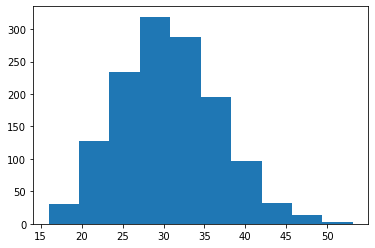

In [19]:
plt.hist(df.bmi)

## 4.2 Histogram: Charges

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.87 ,  7386.726, 13651.582, 19916.438, 26181.294, 32446.15 ,
        38711.006, 44975.862, 51240.718, 57505.574, 63770.43 ]),
 <BarContainer object of 10 artists>)

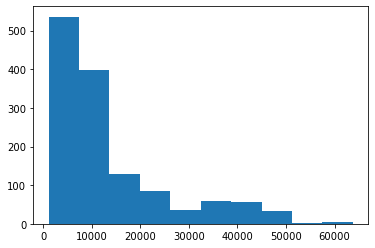

In [20]:
plt.hist(df.charges)

## 4.3 Histogram: Age

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

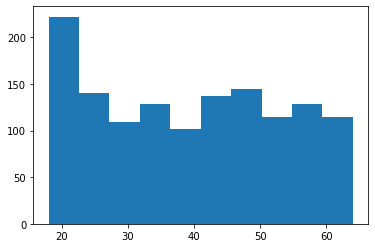

In [21]:
plt.hist(df.age)

## 4.4 Histogram: Children

(array([574.,   0., 324.,   0., 240.,   0., 157.,   0.,  25.,  18.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

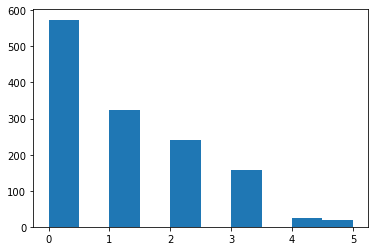

In [22]:
plt.hist(df.children)

# 5. Feature Engineering: Label Encoding

- In order to realize the correlation of the features the row values are converted from object to numerical.

In [23]:
le = preprocessing.LabelEncoder()
df['sex'] = le.fit_transform(df.sex.values)
df['smoker'] = le.fit_transform(df.smoker.values)
#converted 'sex' and 'smoker' into binary in order to see how gender correlates to charges
#male = 1, female = 0
#regions have no correlations

### 5.0.1 Evaluationg Distribution of Males and Females

In [24]:
df.loc[df.sex == 0].count(), df.loc[df.sex == 1].count()
#662 females, 676 males

(age         662
 sex         662
 bmi         662
 children    662
 smoker      662
 region      662
 charges     662
 dtype: int64,
 age         676
 sex         676
 bmi         676
 children    676
 smoker      676
 region      676
 charges     676
 dtype: int64)

## 5.1 Drop region Column

- Dropping due to negative correlation.

In [25]:
df.drop(['region'], axis =1, inplace = True)

In [26]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.90,0,1,16884.92
1,18,1,33.77,1,0,1725.55
2,28,1,33.00,3,0,4449.46
3,33,1,22.70,0,0,21984.47
4,32,1,28.88,0,0,3866.86


## 5.2 Checking Column Correlations to the Charges feature

In [27]:
corr_matrix = df.corr()
corr_matrix['charges'].sort_values(ascending=False)
#correlation matrix between charges and factors

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198331
children    0.067998
sex         0.057292
Name: charges, dtype: float64

# 5.3. Data Visualization: Heatmap (Correlation)

<AxesSubplot:>

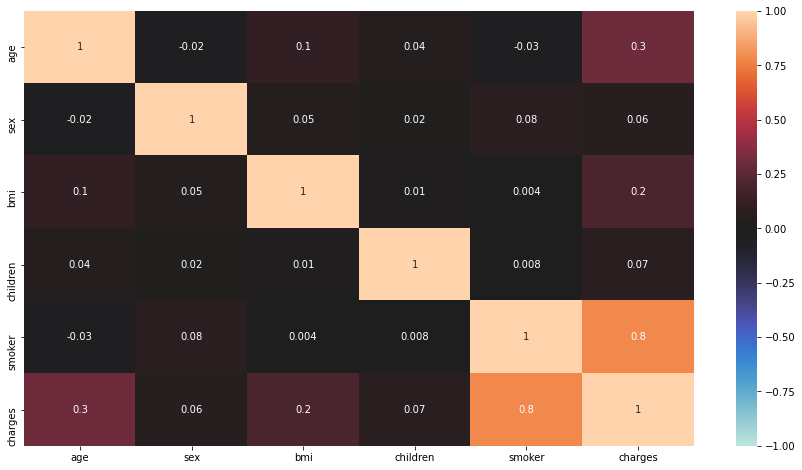

In [28]:
fig = plt.gcf()
fig.set_size_inches(15,8)
sns.heatmap(corr_matrix, annot = True, fmt = '.1g', vmin=-1, vmax=1, center =0, cmap='icefire')
#heatmap from the data in correlation matrix

# 6. Indentifying Trends: From Highest Correlation

- **Male vs Female**
- **Smoker vs Non-Smoker**

In [29]:
check_rates = df.groupby(['sex', 'smoker'])['charges'].mean()
check_rates
#checks the average of all the rates rates of males, females, smokers, and non-smokers

sex  smoker
0    0          8762.297185
     1         30678.996087
1    0          8087.204855
     1         33042.006226
Name: charges, dtype: float64

## 6.1 **Analysis Insight:** 
On average, females that do not smoke are charged more than males that do not smoke, while males that smoke are charged more than females that smoke.

In [30]:
check_rates_median = df.groupby(['sex', 'smoker'])['charges'].median()
check_rates_median
#checks the median of all middle the rates rates of males, females, smokers, and non-smokers

sex  smoker
0    0          7639.42
     1         28950.47
1    0          6985.51
     1         36085.22
Name: charges, dtype: float64

## 6.2 Preparing Data: Category Plot

- Created a Data Frame to display the Median values for male and female smoker and non-smoker Charges data.
- Using Median to avoid exposer to heavily weighted outliers.

In [31]:
rates = pd.DataFrame(data={'Gender': ['Female', 'Male'],
                          'Smoker': [28950.47, 36085.22],
                          'Non-Smoker': [7639.42, 6985.51]})

rates_plot = pd.melt(rates, id_vars = 'Gender')
rates_plot.rename(columns = {'Gender': 'Gender', 'variable': 'Smokes', 'value':'Charges'}, inplace =True)
#rename columns to fit descriptor
rates_plot

,Gender,Smokes,Charges
0,Female,Smoker,28950.47
1,Male,Smoker,36085.22
2,Female,Non-Smoker,7639.42
3,Male,Non-Smoker,6985.51


## 6.3 Data Visualization: Category side by side Bar plot

<Figure size 432x288 with 0 Axes>

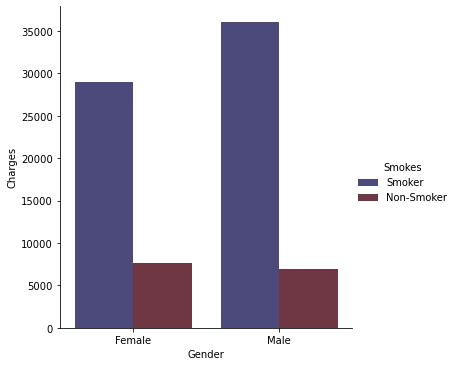

In [32]:
fig = plt.figure()
sns.catplot(x = 'Gender', y = 'Charges',
               hue = 'Smokes', data = rates_plot, kind = 'bar', palette = 'icefire')

## 7 Data Visualization: ScatterPlot

- Visualizing feature correlation to charges.

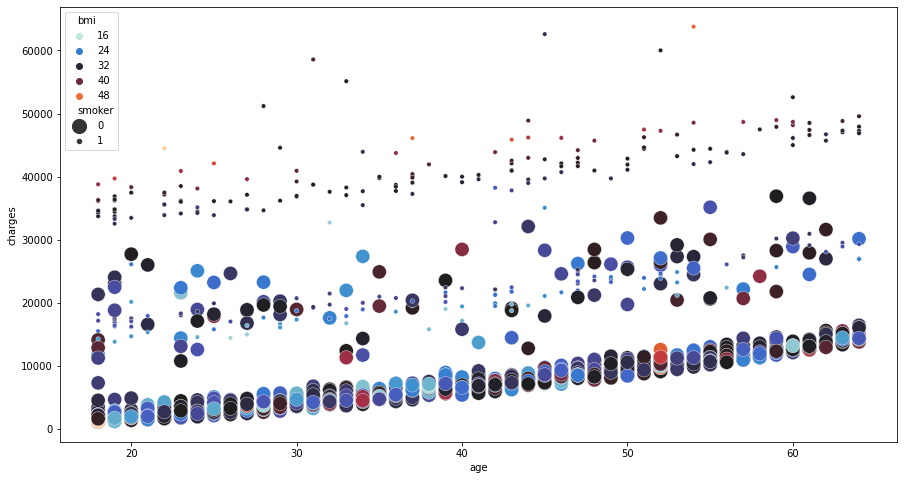

In [33]:
fig = plt.gcf()
fig.set_size_inches(15,8)
sns.scatterplot(
        data = df, x = 'age', y = 'charges', hue = 'bmi', size = 'smoker', sizes = (20, 200), legend = 'auto', palette = 'icefire'
)
plt.show()
#scatterplot using primary correlations to price

## 7.1 **Analysis Insight:**
- Clear trend lines indicate that the bottom line represents non-smokers with low bmi. 
- The middle group shows smokers and non-smoker with generally low bmi. 
- The top trend line represents smokers with high bmi.

## 7.2 Exporting CSV Prepared for Machine Learning

In [34]:
df.to_csv('C:\\Users\\awsum\\Documents\\Algos\\python-portfolio-project-starter-files\\python-portfolio-project-starter-files\\insurance_ml.csv')